# Using VGG16

This notebook is just me using vgg16 to do a very simple prediction. VGG16 is much more well trained and goes into deeper specifics. This model predicts the breed of dog rather than just dog. I have no idea if this is a corect prediction but it does clearly predict that the image is a dog.

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', include_top=True)

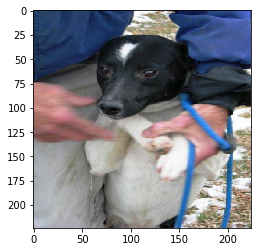

In [3]:
image = load_img('test1/1.jpg', target_size = (224, 224)) # VGG takes in inputs of size 224, 224
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

In [4]:
image = img_to_array(image)
image = np.expand_dims(image, axis = 0)
image = preprocess_input(image)

It should be noted that if I have another notebook loaded previously, this line will crash python. If you close all jupyter completely, as in at the command line level, all errors will be fixed.

In [5]:
prediction = model.predict(image)

In [6]:
from keras.applications.vgg16 import decode_predictions
label = decode_predictions(prediction)

In [7]:
print(label[0][0])

('n02091032', 'Italian_greyhound', 0.25170964)


# Adding onto VGG16

In [8]:
from keras.applications import VGG16

base = VGG16(weights = 'imagenet',
            include_top = False,
            input_shape = (150, 150, 3))

In [9]:
base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [10]:
base.trainable = True

set_trainable = False
for layer in base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [13]:
from keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 1e-5),
             metrics = ['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_directory = 'train'
validation_directory = 'validation'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_directory,
                                                       target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
import os.path

if not os.path.isfile('VGG_cats_vs_dogs.h5'):
    history = model.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 100,
                                 validation_data = validation_generator,
                                 validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 65s 655ms/step - loss: 0.5488 - acc: 0.7175 - val_loss: 0.3817 - val_acc: 0.8430
Epoch 2/100
100/100 [==============================] - 59s 586ms/step - loss: 0.3976 - acc: 0.8190 - val_loss: 0.2770 - val_acc: 0.8820
Epoch 3/100
100/100 [==============================] - 59s 586ms/step - loss: 0.3531 - acc: 0.8400 - val_loss: 0.2334 - val_acc: 0.9070
Epoch 4/100
100/100 [==============================] - 57s 571ms/step - loss: 0.3450 - acc: 0.8405 - val_loss: 0.2420 - val_acc: 0.9020
Epoch 5/100
100/100 [==============================] - 57s 566ms/step - loss: 0.3165 - acc: 0.8625 - val_loss: 0.2613 - val_acc: 0.8940
Epoch 6/100
100/100 [==============================] - 48s 483ms/step - loss: 0.3049 - acc: 0.8740 - val_loss: 0.2002 - val_acc: 0.9170
Epoch 7/100
100/100 [==============================] - 48s 484ms/step - loss: 0.2893 - acc: 0.8710 - val_loss: 0.2143 - val_acc: 0.9150
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 28s 281ms/step - loss: 0.1529 - acc: 0.9400 - val_loss: 0.1017 - val_acc: 0.9610
Epoch 62/100
100/100 [==============================] - 28s 282ms/step - loss: 0.1513 - acc: 0.9390 - val_loss: 0.1566 - val_acc: 0.9400
Epoch 63/100
100/100 [==============================] - 28s 282ms/step - loss: 0.1540 - acc: 0.9490 - val_loss: 0.1037 - val_acc: 0.9560
Epoch 64/100
100/100 [==============================] - 28s 281ms/step - loss: 0.1581 - acc: 0.9380 - val_loss: 0.1485 - val_acc: 0.9410
Epoch 65/100
100/100 [==============================] - 28s 282ms/step - loss: 0.1510 - acc: 0.9390 - val_loss: 0.1411 - val_acc: 0.9540
Epoch 66/100
100/100 [==============================] - 28s 281ms/step - loss: 0.1628 - acc: 0.9330 - val_loss: 0.1400 - val_acc: 0.9500
Epoch 67/100
100/100 [==============================] - 28s 281ms/step - loss: 0.1395 - acc: 0.9390 - val_loss: 0.1351 - val_acc: 0.9540
Epoch 68/100
100/100 [===================

In [16]:
model.save('VGG_cats_vs_dogs.h5')

In [2]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

base = VGG16(weights = 'imagenet',
            include_top = False,
            input_shape = (150, 150, 3))

base.trainable = True

set_trainable = False
for layer in base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 1e-5),
             metrics = ['acc'])

Using TensorFlow backend.


In [3]:
train_directory = 'train'
validation_directory = 'validation'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_directory,
                                                       target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [6]:
import os.path
import os

epochs = 50
batch_size = 16

train_num = len(os.listdir('train/dogs'))
validation_num = len(os.listdir('validation/dogs'))

if not os.path.isfile('VGG_cats_vs_dogs2.h5'):
    history2 = model.fit_generator(train_generator,
                                 steps_per_epoch = train_num // batch_size,
                                 epochs = 100,
                                 validation_data = validation_generator,
                                 validation_steps = validation_num // batch_size)
    
    model.save('VGG_cats_vs_dogs2.h5')

Epoch 1/100
625/625 [==============================] - 325s 520ms/step - loss: 0.3914 - acc: 0.8156 - val_loss: 0.1948 - val_acc: 0.9196
Epoch 2/100
202/625 [========>.....................] - ETA: 2:48 - loss: 0.3035 - acc: 0.8646

KeyboardInterrupt: 